# Overlapping Generation Model
## S-period-lived Agents with Exogenous Labor Supply


Prof. Richard Evans

Author: Martina Fraschini

In [1]:
# import packages
import numpy as np
import time
from matplotlib import pyplot as plt
from scipy import optimize
from math import sqrt

### Exercise 3.2

In [5]:
# define utility function and its derivative
def u(c, gamma):
    if c <= 0:
        return -9999999
    else:
        f = (c**(1-gamma) - 1) / (1 - gamma)
        return f

def du(c, gamma):
    if c <= 0:
        return -9999999
    else:
        df = c ** (-gamma)
        return df

# define function to get the interest rate
def get_r(b, par):
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = par
    K = sum(b)
    r = alpha * A * (L/K)**(1-alpha) - delta
    return r

# define function to get the wage rate
def get_w(b, par):
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = par
    K = sum(b)
    w = (1-alpha) * A * (K/L)**alpha
    return w

# define function to get the consumptions
def get_c(b, par):
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = par
    
    S = len(b)+1
    w_bar = get_w(b,par)
    r_bar = get_r(b,par)
    c = np.zeros((S))
    c[0] = w_bar * nvec[0] - b[0]
    for i in range(1,S-1):
        c[i] = w_bar * nvec[i] + (1+r_bar) * b[i-1] - b[i]
    c[-1] = w_bar * nvec[-1] + (1+r_bar) * b[-1]
    
    return c


# define system of Euler equations
def euler_eq(b_guess, p):
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = p
    
    S = len(b_guess)+1
    c = get_c(b_guess, p)
    r = get_r(b_guess,p)
    eq = []
    for i in range(S-1):
        eq.append(du(c[i], sigma) - beta*(1+r)*du(c[i+1], sigma))
    
    return eq
    

# define function to get the steady-state equilibrium
def get_SS(params, bvec_guess, SS_graphs):
    # check time
    start_time = time.clock()
    # unpack parameters
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    
    # solve system of Euler equations --> get new bvec
    b_solve = optimize.root(euler_eq, bvec_guess, args=params)
    b_ss = b_solve.x
    
    # aggregate capital
    K_ss = sum(b_ss)
    # interest rate
    r_ss = get_r(b_ss, params)
    # wage rate
    w_ss = get_w(b_ss, params)
    # consumption
    c_ss = get_c(b_ss, params)
    # production function
    Y_ss = A * K_ss**alpha * L**(1-alpha)
    # aggregate consumption
    C_ss = sum(c_ss)
    
    # define Euler errors
    EulErr_ss = euler_eq(b_ss, params)
    
    # resource constraint
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    
    # measure time
    ss_time = time.clock() - start_time

    ss_output = {
        'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
        'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
        'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
        'ss_time': ss_time}
    
    if SS_graphs:
        S = len(c_ss)
        plt.plot(range(S), c_ss, 'o-', label='consumption')
        plt.plot(range(S-1), b_ss, 'o-', label='savings')
        plt.xlabel("Age")
        plt.legend()
        plt.grid()
        plt.show()
    
    return ss_output

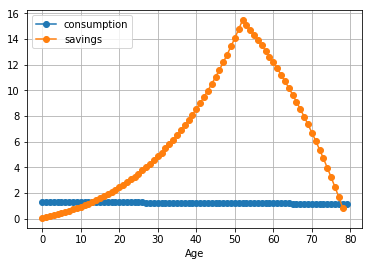

b_ss  : [ 0.06051915  0.12544728  0.19494146  0.26916448  0.3482851   0.43247822
  0.52192513  0.61681373  0.71733879  0.82370217  0.93611311  1.05478847
  1.17995304  1.3118398   1.45069023  1.59675463  1.75029242  1.91157249
  2.08087354  2.25848443  2.44470458  2.6398443   2.84422524  3.05818079
  3.28205648  3.51621046  3.76101392  4.01685163  4.28412237  4.56323945
  4.85463128  5.15874189  5.4760315   5.80697711  6.15207313  6.511832
  6.88678483  7.27748213  7.68449447  8.10841322  8.54985132  9.00944409
  9.48784999  9.98575149 10.50385598 11.04289661 11.60363329 12.18685362
 12.79337396 13.42404039 14.07972987 14.76135135 15.46984691 15.10214629
 14.72305542 14.33215564 13.92901307 13.51317797 13.08418424 12.64154879
 12.18477091 11.71333163 11.2266931  10.72429784 10.20556806  9.66990489
  9.11668766  8.54527306  7.95499433  7.34516041  6.71505505  6.06393589
  5.39103352  4.69555046  3.97666018  3.23350602  2.46520007  1.67082209
  0.84941826]
c_ss  : [1.3195392  1.31733671 

In [6]:
S = 80
n = np.empty([S,])
for s in range(S):
    if s+1 <= round(2*S/3):
        n[s] = 1.
    else:
        n[s] = .2
parameters = [.96, 3, n, sum(n), 1, .35, .05, 1e-6]
bvec = np.ones((S-1))/2
graph = True

steadystate = get_SS(parameters, bvec, graph)
for key, item in steadystate.items():
    print("{:5s}".format(key), ":", item)

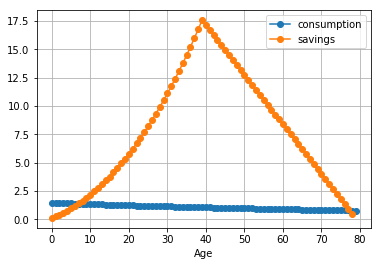

b_ss  : [ 0.12750186  0.26877057  0.42394716  0.59317577  0.77660375  0.97438164
  1.18666326  1.41360578  1.6553697   1.91211899  2.18402106  2.47124688
  2.77397097  3.09237154  3.42663045  3.77693334  4.14346965  4.52643271
  4.92601977  5.34243207  5.77587492  6.22655773  6.69469411  7.18050193
  7.68420335  8.20602495  8.74619773  9.30495724  9.88254364 10.47920172
 11.09518106 11.73073603 12.38612592 13.06161499 13.75747256 14.47397307
 15.2113962  15.97002694 16.75015566 17.5520782  17.10917075 16.66717719
 16.22604588 15.78572483 15.3461617  14.9073038  14.46909804 14.03149097
 13.59442876 13.15785715 12.72172146 12.28596663 11.8505371  11.41537693
 10.98042966 10.54563841 10.11094578  9.67629388  9.24162434  8.80687824
  8.37199615  7.93691806  7.50158346  7.06593121  6.62989962  6.1934264
  5.75644864  5.31890281  4.88072472  4.44184957  4.00221184  3.56174537
  3.12038329  2.67805799  2.23470117  1.79024375  1.34461593  0.89774709
  0.44956585]
c_ss  : [1.45615469 1.44455041

In [7]:
S = 80
n = np.empty([S,])
for s in range(S):
    if s+1 <= round(S/2):
        n[s] = 1.
    else:
        n[s] = .2
parameters = [.96, 3, n, sum(n), 1, .35, .05, 1e-6]
bvec = np.ones((S-1))*0.15
graph = True

steadystate = get_SS(parameters, bvec, graph)
for key, item in steadystate.items():
    print("{:5s}".format(key), ":", item)